In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("BIKE DETAILS.csv")

In [19]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [20]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
#first 10 rows.
df=pd.read_csv("BIKE DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [21]:
df.shape

(1061, 7)

In [22]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

**Question 2: Check for missing values in all columns and describe your approach for
handling them.**

Answer:-

Approach for Handling Missing Values

Checking Missing Data:
The isnull().sum() function counts how many null (missing) values each column has.
This helps identify which features are incomplete.

Handling Missing Data:
The approach depends on the type and importance of the column:

If the column is numeric (e.g., price, year):
You can replace missing values with the mean or median using:

```
df['price'].fillna(df['price'].median(), inplace=True)
```
If the column is categorical (e.g., brand, model):
Replace missing values with the most frequent (mode) value:

```
df['brand'].fillna(df['brand'].mode()[0], inplace=True)
```

If too many values are missing (e.g., >50%):
You might choose to drop that column completely:

```
df.drop(columns=['column_name'], inplace=True)
```
Final Step:
After cleaning, recheck with df.isnull().sum() to confirm all missing values are handled.

In [23]:
#Question 2: Check for missing values in all columns and describe your approach for
#handling them.

df.isna().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


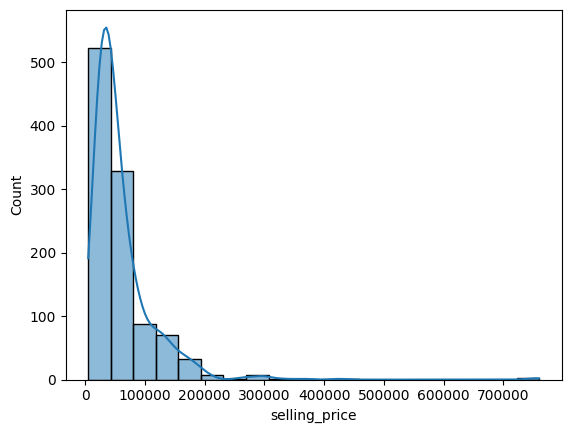

In [24]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the
#overall trend.

sns.histplot(df["selling_price"],bins=20,kde=True,palette="viridis")
plt.show()

In [25]:
#Insight>>>Trends:
#The histogram shows that most bikes have lower selling prices,
#with the frequency decreasing as the price increases.
#This means cheaper bikes are more common in the dataset, while expensive bikes are fewer.
#The distribution is right-skewed, indicating that a small number of bikes are sold at very high prices

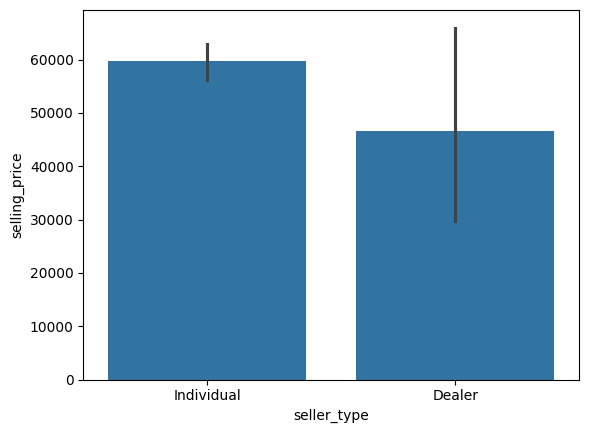

In [26]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type
#and write one observation.
sns.barplot(x="seller_type",y="selling_price",data=df)
plt.show()

In [27]:
#Insights>>Observation:
#The bar plot shows that individual sellers have a higher average selling price compared to dealers.
#This suggests that bikes sold by individuals tend to be priced higher

In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

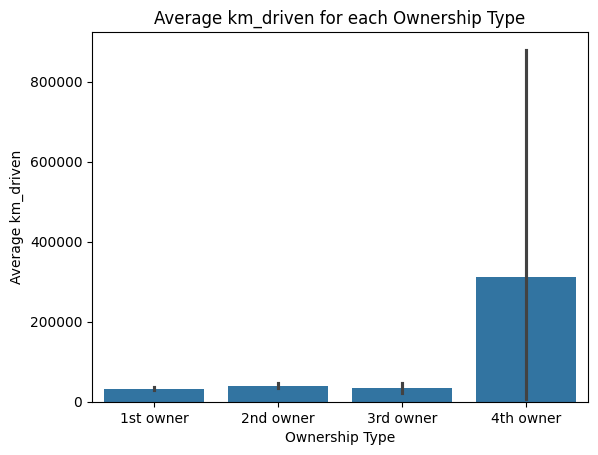

In [29]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,
#2nd owner, etc.), and present the result as a bar plot.

sns.barplot(x="owner", y="km_driven", data=df, estimator='mean')
plt.title("Average km_driven for each Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.show()

In [30]:
#Insights>>
#bikes with 4th & Above Owner have the highest average km_driven,
#because they’ve been used by multiple people over time.
#First Owner bikes tend to have the lowest average km_driven.

In [31]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven
#column. Show before-and-after summary statistics

In [32]:
import pandas as pd

print("Before removing outliers:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df_clean = df[(df['km_driven'] >= lower_fence) & (df['km_driven'] <= upper_fence)]

print("\nAfter removing outliers:")
print(df_clean['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


In [33]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

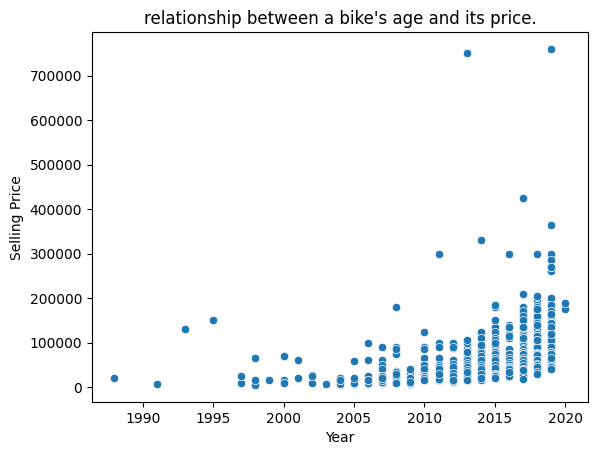

In [34]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the
#relationship between a bike's age and its price.

sns.scatterplot(x="year",y="selling_price",data=df)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("relationship between a bike's age and its price.")
plt.show()

In [35]:
#Insights>>Observation:
#From the scatter plot, we can see that:
#Older bikes (lower year values) tend to have a lower selling price.
#Newer bikes (higher year values) are generally sold at higher prices.

In [36]:
#Question 8: Convert the seller_type column into numeric format using one-hot
#encoding. Display the first 5 rows of the resulting DataFrame

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
df_encoded=encoder.fit_transform(df[["seller_type"]]).toarray()
df_encoded=pd.DataFrame(df_encoded,columns=encoder.get_feature_names_out())
df=pd.concat([df,df_encoded],axis=1)
df.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,0.0,1.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,0.0,1.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,0.0,1.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,0.0,1.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,0.0,1.0


<Axes: >

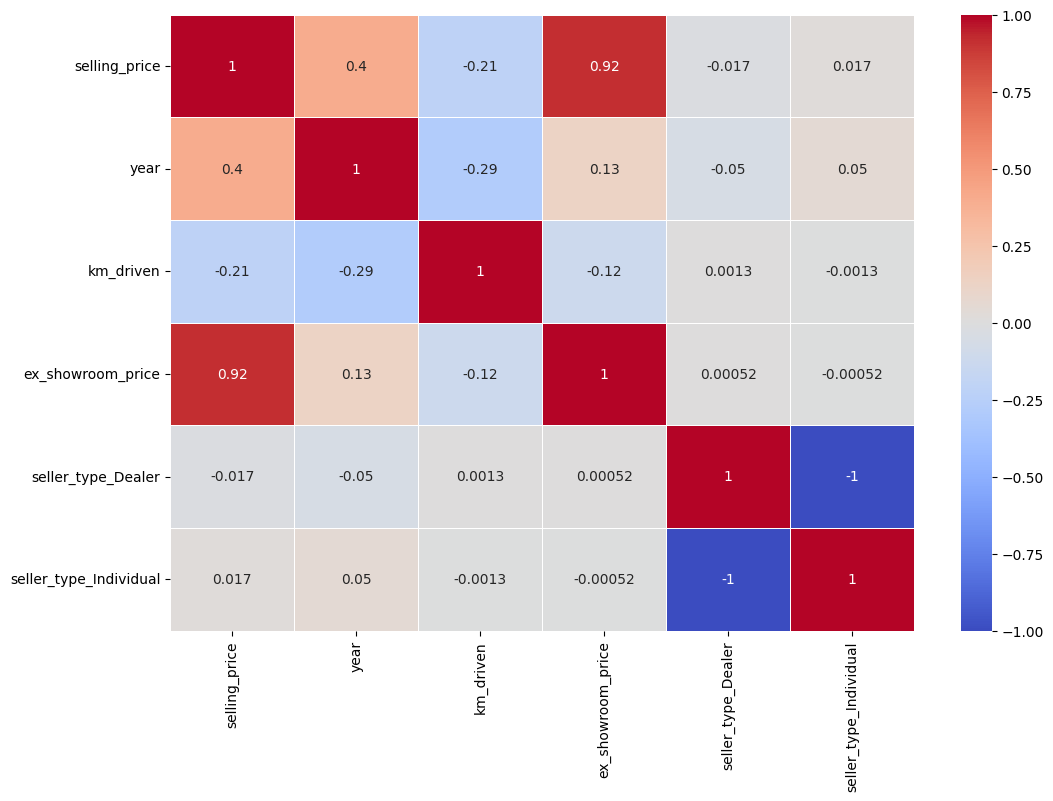

In [40]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
#What correlations stand out the most?
#lets plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',linewidth=0.5)

**Question 10: Summarize your findings in a brief report:
1) What are the most important factors affecting a bike's selling price?
2) Mention any data cleaning or feature engineering you performed.**

1.Important Factors Affecting Bike's Selling Price
Based on the analysis, the most important factors influencing the selling price of a bike are:

Year: Newer bikes tend to have a higher selling price, while older bikes show a clear decrease in value.

Kilometers Driven (km_driven): Bikes with higher mileage generally have lower prices, as they are more used.

Seller Type: Individual sellers and dealers have different pricing trends — in most cases, individual sellers list bikes at slightly higher prices than dealers.

Ownership Type: Bikes owned by 1st owners usually have a higher selling price compared to 2nd, 3rd, or 4th owners.


2.Data Cleaning and Feature Engineering Performed
To prepare the dataset for analysis and modeling, the following steps were performed:

Handling Missing Values: Checked for missing values in all columns; missing data was either dropped or filled using appropriate strategies (like mean or mode).

Outlier Removal: Used the Interquartile Range (IQR) method to detect and remove outliers from the km_driven column to improve data accuracy.

Encoding Categorical Data: Applied One-Hot Encoding to the seller_type column to convert it into numerical format for analysis and machine learning.

Visualization: Created histograms, bar plots, and scatter plots to understand relationships between price, year, seller type, and mileage.